In [2]:
# stock market prediction using LSTM for stocks such as Tesla Stock Proce, S&P 500, Amazon, Google, and Microsoft
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#for reading stock market data
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# for time stamps 
from datetime import datetime

In [3]:
# stock for analysis Apple, Google, Microsoft, Amazon
stock_list = ["AAPL", "GOOG", "MSFT", "AMZN"]
#end and start time for the data download data for one year 
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [4]:
#download stock using yahoo finance
for stock in stock_list:
    globals() [stock] = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
#change in price over time
company_list = [AAPL,GOOG,MSFT,AMZN]
company_name = ["APPLE","GOOGLE","MICROSOFT","AMAZON"]

for company, comname in zip(company_list,company_name):
    company["company_name"] = comname

df = pd.concat(company_list,axis=0)
df.head(100)

# if you are working on a single company such as apple
# ap=pd.DataFrame(AAPL)
# ap.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-08-12,169.820007,172.169998,169.399994,172.100006,171.316086,68039400,APPLE
2022-08-15,171.520004,173.389999,171.350006,173.190002,172.401123,54091700,APPLE
2022-08-16,172.779999,173.710007,171.660004,173.029999,172.241867,56377100,APPLE
2022-08-17,172.770004,176.149994,172.570007,174.550003,173.754929,79542000,APPLE
2022-08-18,173.750000,174.899994,173.119995,174.149994,173.356735,62290100,APPLE
...,...,...,...,...,...,...,...
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674026,85438400,APPLE
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.233658,75703700,APPLE
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.552719,77034200,APPLE


In [6]:
#describtive statistics about the data
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,159.325180,161.088128,157.718406,159.451633,159.124632,7.049696e+07
std,18.235760,17.989419,18.512241,18.224122,18.380618,2.356880e+07
min,126.010002,127.769997,124.169998,125.019997,124.656975,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.470390,5.246465e+07
50%,154.789993,157.089996,153.369995,155.000000,154.602554,6.587450e+07
75%,173.010002,173.875000,171.675003,173.110001,172.840004,8.135480e+07
max,196.240005,198.229996,195.279999,196.449997,196.449997,1.647624e+08


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-12 to 2023-08-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


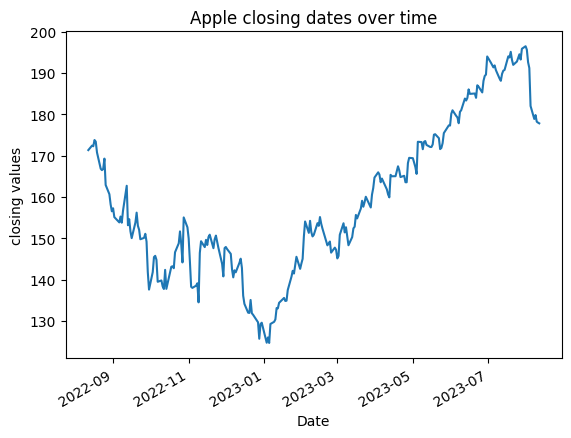

In [8]:
# plot close date for apple
plt.figure()
AAPL['Adj Close'].plot()
plt.title("Apple closing dates over time")
plt.xlabel("Date")
plt.ylabel("closing values")
plt.show()

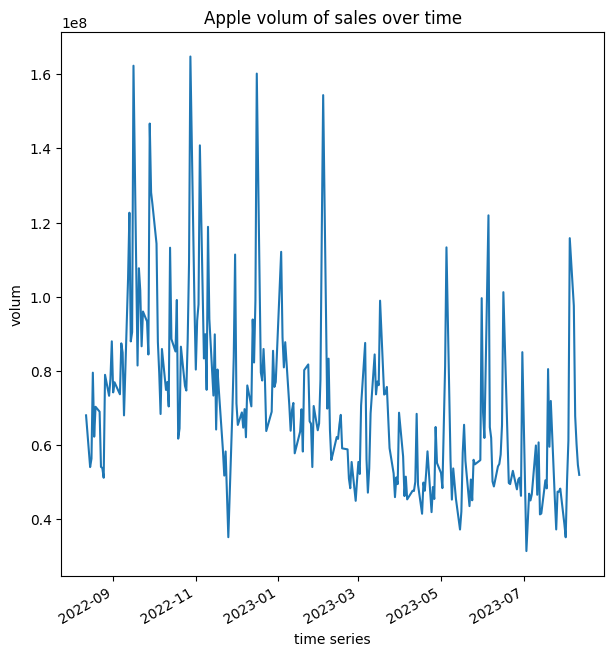

In [9]:
#volum of sales
plt.figure(figsize=(7,8))
AAPL['Volume'].plot()
plt.title("Apple volum of sales over time")
plt.xlabel("time series")
plt.ylabel("volum")
plt.show()

In [10]:
#moving average MA is an analytical tool to constantly updating the stock proces through its average
mo_avg = [10,20,50]
for i in mo_avg:
    colomn_name = f'Moving_avg_{i}'
    AAPL[colomn_name] = AAPL['Adj Close'].rolling(i).mean()

AAPL.head(100)
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-12 to 2023-08-11
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           251 non-null    float64
 1   High           251 non-null    float64
 2   Low            251 non-null    float64
 3   Close          251 non-null    float64
 4   Adj Close      251 non-null    float64
 5   Volume         251 non-null    int64  
 6   company_name   251 non-null    object 
 7   Moving_avg_10  242 non-null    float64
 8   Moving_avg_20  232 non-null    float64
 9   Moving_avg_50  202 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 21.6+ KB


In [11]:
AAPL['Moving_avg_10'].fillna(AAPL['Moving_avg_10'].mean(),inplace=True)
AAPL['Moving_avg_20'].fillna(AAPL['Moving_avg_20'].mean(),inplace=True)
AAPL['Moving_avg_50'].fillna(AAPL['Moving_avg_50'].mean(),inplace=True)
AAPL.info(10)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-12 to 2023-08-11
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           251 non-null    float64
 1   High           251 non-null    float64
 2   Low            251 non-null    float64
 3   Close          251 non-null    float64
 4   Adj Close      251 non-null    float64
 5   Volume         251 non-null    int64  
 6   company_name   251 non-null    object 
 7   Moving_avg_10  251 non-null    float64
 8   Moving_avg_20  251 non-null    float64
 9   Moving_avg_50  251 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 21.6+ KB


In [12]:
#example 
a=pd.DataFrame({'d':[1,6,3,4,7,5]})
b=a.rolling(3).sum()
b
a

,d
0,1
1,6
2,3
3,4
4,7
5,5


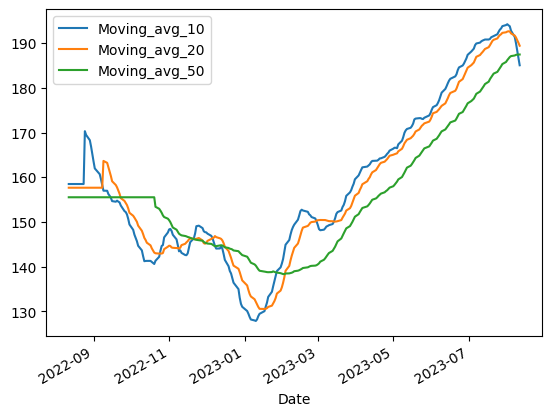

In [13]:
data1 = AAPL.loc[:,['Moving_avg_10','Moving_avg_20','Moving_avg_50']]
data1.plot()
plt.show()
# plt.figure(figsize=(7,7))
# sbs.pairplot(data1[['Survived','Pclass','Age','SibSp','Parch','Fare']],hue="Survived",palette="dark")

In [14]:
#compute dialy average return using percentage change function (pct_change) 
AAPL['Dialy_return'] = AAPL['Adj Close'].pct_change()
AAPL.head(10)
AMZN["Dialy_return"] = AMZN["Adj Close"].pct_change()
MSFT["Dialy_return"] = MSFT["Adj Close"].pct_change()
GOOG["Dialy_return"] = GOOG["Adj Close"].pct_change()

# plt.plot(AAPL['Dialy_return'])
# plt.legend("Dialy Average")
# plt.title("Dialy average return")
# plt.xlabel("time")
# plt.ylabel('Value')
# plt.show()

# GOOG.head(10)
# AMZN['Adj Close'].plot() 
# AMZN.info()  
# AMZN["new_colomn"] = AMZN["Open"].mean()
# AMZN.drop("new_colomn",axis=1)

# fig, axes = plt.subplots(nrows=2,ncols=1)
# data1.plot(kind='hist', y='Defense', bins=40, range=(0,250), ax=axes[0])
# data1.plot(kind='hist', y='Defense', bins=40, range=(0,250), ax=axes[1], cumulative=True)

In [15]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,Dialy_return
Date,,,,,,,,
2022-08-12,121.160004,122.650002,120.400002,122.650002,122.650002,16121100,GOOGLE,NaN
2022-08-15,122.209999,123.260002,121.570000,122.879997,122.879997,15525000,GOOGLE,0.001875
2022-08-16,122.320000,123.227997,121.535004,122.510002,122.510002,15626200,GOOGLE,-0.003011
2022-08-17,120.930000,122.150002,120.199997,120.320000,120.320000,17589200,GOOGLE,-0.017876
2022-08-18,120.230003,121.690002,119.550003,120.860001,120.860001,15652000,GOOGLE,0.004488


<Axes: >

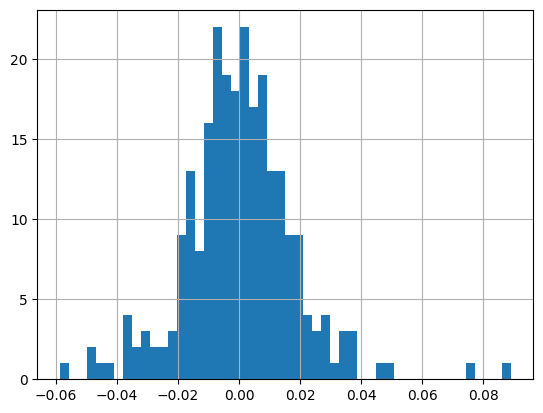

In [16]:
AAPL['Dialy_return'].hist(bins=50)


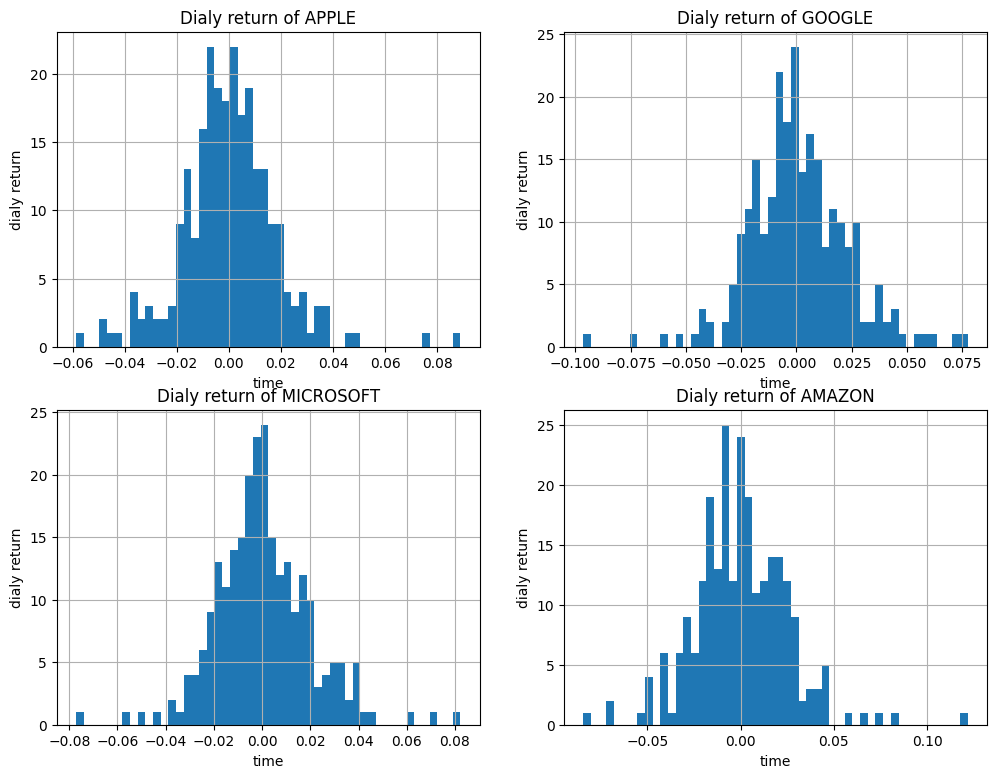

In [17]:
#hist for all companies
# company_list
company_list = [AAPL,GOOG,MSFT,AMZN]

plt.figure(figsize=(12, 9))
for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Dialy_return'].hist(bins=50)
    plt.xlabel("time")
    plt.ylabel('dialy return')
    title= f'Dialy return of {company_name[i-1]}'
    plt.title(title)



In [18]:
# correlation between companies
# list all the closes in one data frame
# closing_df = pd.DataFrame()
# company_list = [AAPL,GOOG,MSFT,AMZN]
# closing_df['Adj Close_Apple'] = AAPL['Adj Close']
# closing_df['Adj Close_Google'] = GOOG['Adj Close']
# closing_df['Adj Microsoft'] = MSFT['Adj Close']
# closing_df['Adj Close_Amazon'] = AMZN['Adj Close']
tech_list = ['AAPL','GOOG','MSFT','AMZN']


closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-12,NaN,NaN,NaN,NaN
2022-08-15,0.006333,-0.002578,0.001875,0.005344
2022-08-16,-0.000924,0.011175,-0.003011,-0.002590
2022-08-17,0.008785,-0.018511,-0.017876,-0.002636
2022-08-18,-0.002292,0.001407,0.004488,-0.003948


C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

<Figure size 1000x1000 with 0 Axes>

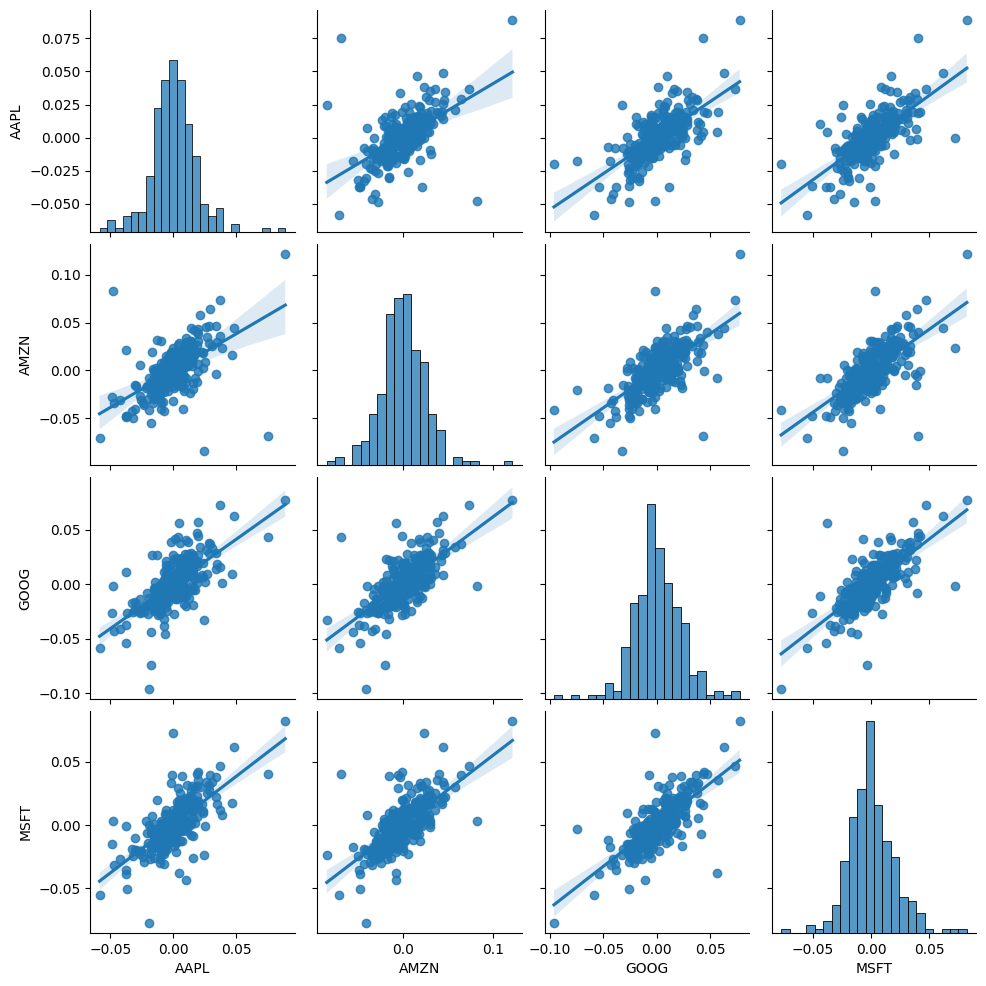

In [19]:
plt.figure(figsize=(10,10))
sns.pairplot(tech_rets, kind='reg', palette="dark")


In [113]:
# plt.figure(figsize=(7,7))
# tech_figure = sns.pairplot(tech_rets)
# tech_figure.map_upper(plt.scatter, color='purple')
# tech_figure.map_lower(sns.kdeplot, cmap='cool_d')

Text(0.5, 1.0, 'correlation between stocks for closing value')

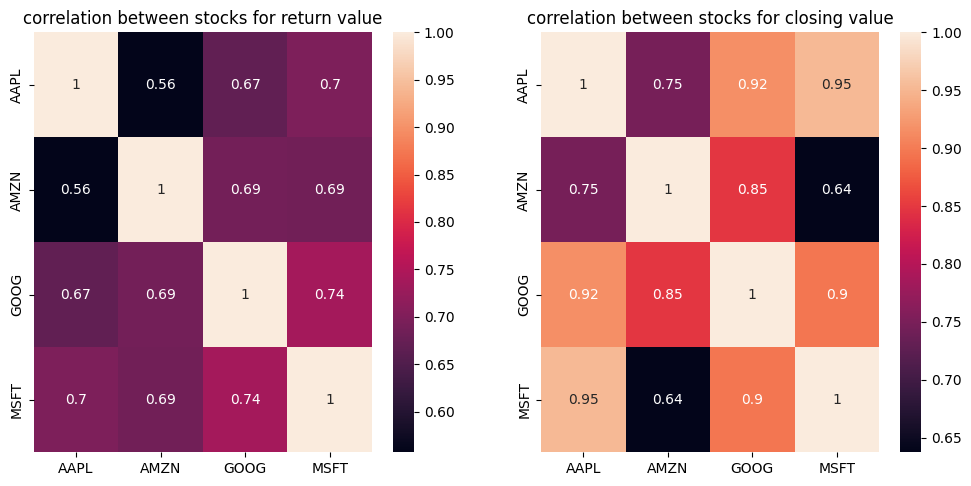

In [20]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True)
plt.title("correlation between stocks for return value")

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot=True)
plt.title("correlation between stocks for closing value")

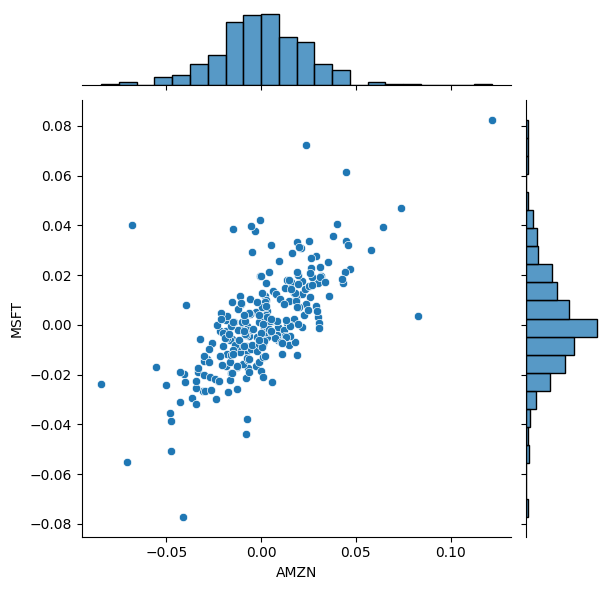

In [21]:
sns.jointplot(x='AMZN',y='MSFT',data=tech_rets,kind='scatter')

In [22]:
df = yf.download('AAPL','2013-01-01', datetime.now())

[*********************100%***********************]  1 of 1 completed


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2671 entries, 2013-01-02 to 2023-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2671 non-null   float64
 1   High       2671 non-null   float64
 2   Low        2671 non-null   float64
 3   Close      2671 non-null   float64
 4   Adj Close  2671 non-null   float64
 5   Volume     2671 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 146.1 KB


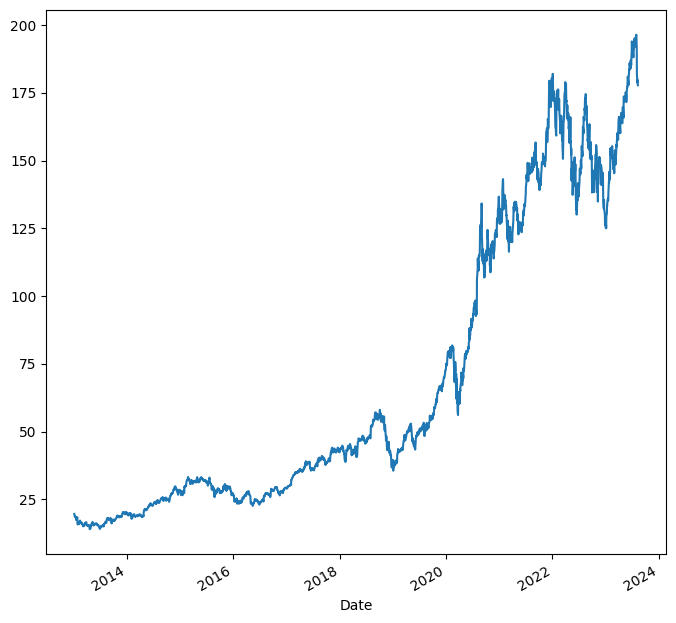

In [24]:
plt.figure(figsize=(8,8))
df['Close'].plot()
# sns.pointplot(df['Close'])
plt.show()

Date
2013-01-02    19.608213
2013-01-03    19.360714
2013-01-04    18.821428
2013-01-07    18.710714
2013-01-08    18.761070
Name: Close, dtype: float64

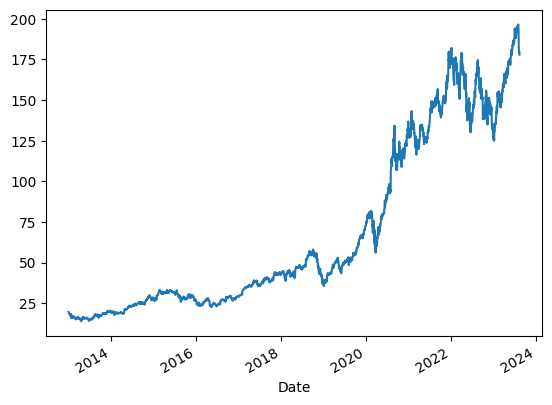

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.nn import LSTM


df_train = df['Close']
df_train.plot()
test_set_size = int(np.round(0.2*df.shape[0]));

df_train.head()



Date
2013-01-02     19.608213
2013-01-03     19.360714
2013-01-04     18.821428
2013-01-07     18.710714
2013-01-08     18.761070
                 ...    
2023-08-07    178.850006
2023-08-08    179.800003
2023-08-09    178.190002
2023-08-10    177.970001
2023-08-11    177.789993
Name: Close, Length: 2671, dtype: float64


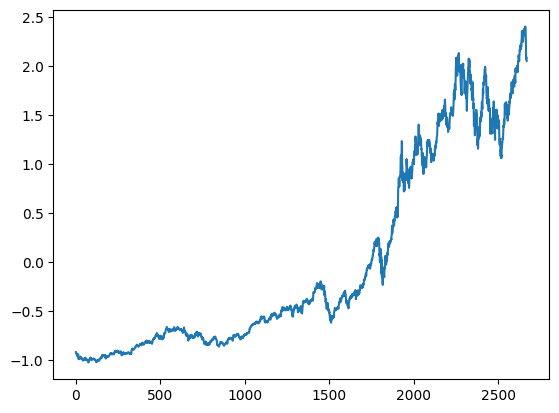

In [38]:
from sklearn.preprocessing import MinMaxScaler
# data_size = len(df_train)
# print(data_size)
# train_size = int(np.ceil(data_size*0.8))
# print(train_size)
# df_train = pd.DataFrame(df_train)
# df_train.head()
# df_train.info()
# data_train, data_test = df_train[0:train_size], df_train[train_size:]

# normalize data
class Normalize():
    def __init__(self) -> None:
        self.mu = None
        self.sd = None
    def fit_transform(self, x):
        self.mu = np.mean(x, axis=(0))
        self.std = np.std(x,axis=(0))
        normalized_x = (x-self.mu)/self.std
        return normalized_x

    def inverse_transform(self, x):
        return (x*self.sd) + self.mu
    
scalar = Normalize()
# scaled_trainData = scalar.fit_transform(data_train.values.reshape(-1,1))
# scaled_testData = scalar.fit_transform(data_test.values.reshape(-1,1)) 
# scaled_trainData.shape
# scaled_testData.shape

# scaler = MinMaxScaler(feature_range=(-1, 1))
scalar = Normalize()
df_tranasformed = scalar.fit_transform(df['Close'].values.reshape(-1,1))
#df_ibm
df_train .shape
df_train.size
print(df_train)
plt.plot(df_tranasformed)

In [39]:
#generating training and validation data
# function to create train, test data given stock data and sequence length
def load_data(stock, look_back):
    data_raw = np.array(stock) # convert to numpy array
    # print(data_raw.shape)
    data = []
    
    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index: index + look_back])
 
    data = np.array(data);

    # print(data.shape)

    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1]
    y_train = data[:train_set_size,-1]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1]
    
    return [x_train, y_train, x_test, y_test]

look_back = 60 # choose sequence length
x_train, y_train, x_test, y_test = load_data(df_tranaformed, look_back)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
data_date = df.index
data_date
y_train

(2089, 59, 1)
(2089, 1)
(522, 59, 1)
(522, 1)


array([[-0.98645612],
       [-0.99567235],
       [-0.99508252],
       ...,
       [ 1.4287583 ],
       [ 1.45015334],
       [ 1.51602747]])

(2671,)
2089


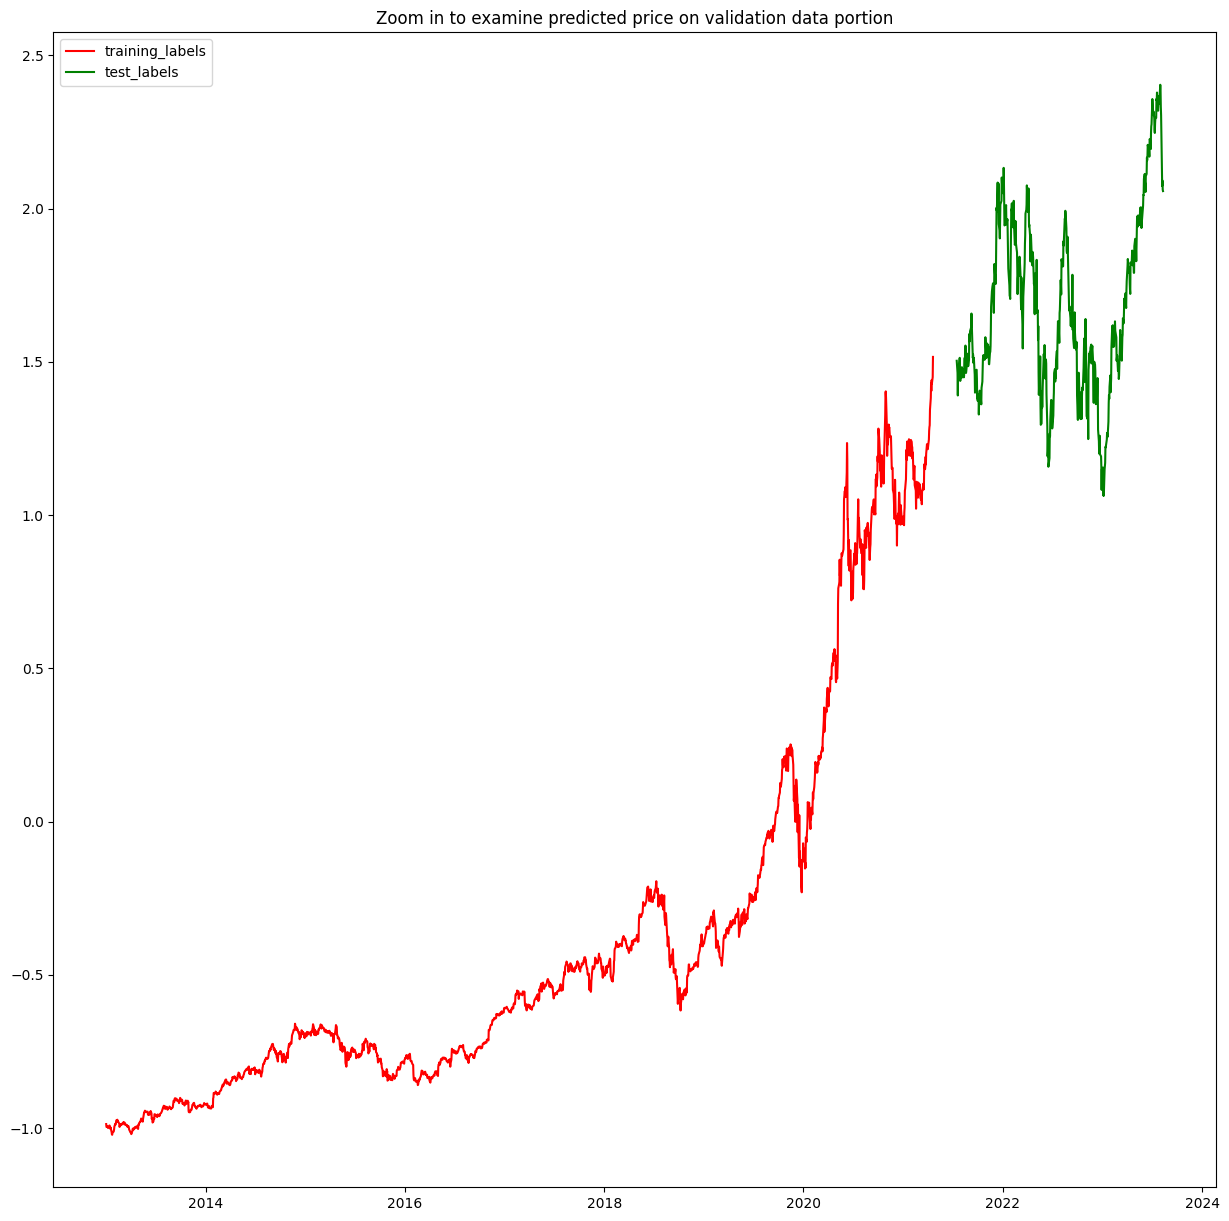

In [46]:
test_set_size = int(np.round(0.2*df_train.shape[0]));
train_set_size = df_train.shape[0] - (test_set_size);

plot_y_train = np.zeros(len(data_date))
plot_y_test =  np.zeros(len(data_date))

print(plot_y_train.shape)
len_y= y_train.shape[0]
len_y_test = y_test.shape[0]
print(len_y)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

plot_y_train[:len_y] = y_train
plot_y_test[len_y+60:] = y_test
plot_y_train = np.where(plot_y_train==0, None, plot_y_train)
plot_y_test = np.where(plot_y_test==0, None, plot_y_test)

fig = plt.figure(figsize=(15,15))
# plt.plot(data_date,df_train, label='x_train', color='blue')
plt.plot(data_date, plot_y_train, label='training_labels', color='red')
plt.plot(data_date, plot_y_test, label='test_labels', color='green')
plt.title("Zoom in to examine predicted price on validation data portion")
plt.legend()
plt.show()

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset


In [54]:
import torchinfo

#example for 2 LSTMs layers and 2 fully connected layers
batch_size = 32
timesteps = 12
input_features = 1
h1_features = 32
h2_features = 16
h3_features = 8
output_features = 1

class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        # self.linear1 =nn.Linear(in_features=input_features, out_features=h1_features)
        self.lstm1 = LSTM(input_size=input_features, hidden_size=h1_features)
        self.lstm2 = LSTM(input_size=h1_features,hidden_size=h2_features)
        self.fc1 = nn.Linear(in_features=h2_features,out_features=output_features)
        self.relu = nn.ReLU()
        # self.fc2 = nn.Linear(in_features=h3_features,out_features=output_features)
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # print(x.size())
        # x = self.linear1(x)
        h1, (h1_t,c1_t) = self.lstm1(x)
        h2, (h2_t,c2_t) = self.lstm2(h1)
        # print('--------------------------------------',h2.shape)

        out = self.fc1(h2_t) # or out = self.fc1(h2_t)
        # print('--------------------------------------',out.shape)
        out = self.relu(out)       
        return out

model = Model()
# error = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(params=model.parameters(),lr=0.001)
print(model)


# torchinfo.summary(model)




Model(
  (lstm1): LSTM(1, 32)
  (lstm2): LSTM(32, 16)
  (fc1): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


In [55]:
class TimeSeries(Dataset):
    def __init__(self, x, y) -> None:
        super().__init__()
        self.x = torch.from_numpy(x.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
      

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        return (self.x[index],self.y[index])
    
training_data = TimeSeries(x_train,y_train)
test_data = TimeSeries(x_test,y_test)
print("training data shape {},{}".format(training_data.x.shape, training_data.y.shape))
print("test data shape {},{}".format(test_data.x.shape, test_data.y.shape))


trian_dataloader = DataLoader(training_data,batch_size=1,shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=True)

# x,y = next(iter(trian_dataloader))
# print(x[0][10])


training data shape torch.Size([2089, 59, 1]),torch.Size([2089])
test data shape torch.Size([522, 59, 1]),torch.Size([522])


In [95]:
# device = 'gpu' if torch.cuda.is_available() else 'cpu'
# model = model.to(device)
loss = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=40, gamma=0.1)
no_epochs = 10

def train_model(model, trainingData, loss, optimizer):
    predicted_trainarray= torch.tensor([])

    for i, (x,y) in enumerate(trainingData):
        # print(f'iteration: {i}, input x: {x.shape}, input y: {y.shape}')
        # forward pass
        y_predict = model(x)
        # predicted_trainarray = torch.concatenate([predicted_trainarray,predicted_train],dim=0)
        lossOut= loss(y_predict,y)
        predicted_trainarray = torch.cat((predicted_trainarray,y_predict),0)

        #Backpropagation
        optimizer.zero_grad()
        lossOut.backward()
        optimizer.step()          
        if i%100 == 0:
            critirion = lossOut.item()
            print(f'iteration number:{i}, Loss value ={critirion}')
    return predicted_trainarray

    lr = scheduler.get_last_lr()[0]
    
    print(f'last lr:{lr}')

    
def test_model(model, test_data, loss):
    predicted_test = torch.tensor([])
    size = len(test_dataloader.dataset)
    mini_batch_size = len(test_dataloader)
    # print(size, mini_batch_size)
    test_loss = 0
    losses = []
    correct = 0
    model.eval()
    with torch.no_grad():
        for x,y in test_data:
            test_pred = model(x)
            predicted_test = torch.cat((predicted_test,test_pred),0)
            test_loss += loss(test_pred,y).item()
            losses.append(test_loss)
            correct = correct + (test_pred.argmax(1)==y).sum().item()
    test_loss = test_loss/mini_batch_size
    accuracy = correct/size
    
    # print(np.shape(test_pred))
    print(f'Test_loss \n accuracy:{accuracy*100}, loss={test_loss}')
    return predicted_test


# for i in range(no_epochs):

#     y_predict = model(x_train)
#     loss=loss(y_predict,y_train)
#     print(f'epoch number: {i}, Mean Square error:{loss.item()}')

#     optimizer.zero_grad()
#     lossOut.backward()
#     optimizer.step()




In [60]:
for i in range (100):
    print(f"epoch {i+1}\n-----")
    predicted_train = train_model(model, trian_dataloader, loss, optimizer)
    # test_model(model, test_dataloader, loss)
    scheduler.step()
torch.save(model.state_dict(), 'stockmodel.pth')
print("saved model dictionary to stockmodel.pth")



epoch 1
-----
iteration number:0, Loss value =0.09782254695892334
iteration number:100, Loss value =0.026770662516355515
iteration number:200, Loss value =0.06602152436971664
iteration number:300, Loss value =0.231481671333313
iteration number:400, Loss value =0.9546442627906799
iteration number:500, Loss value =0.05948180705308914
iteration number:600, Loss value =0.30100783705711365
iteration number:700, Loss value =0.31071221828460693
iteration number:800, Loss value =0.29782432317733765
iteration number:900, Loss value =0.11327803879976273
iteration number:1000, Loss value =0.684181809425354
iteration number:1100, Loss value =0.2132110595703125
iteration number:1200, Loss value =0.25092604756355286
iteration number:1300, Loss value =0.10165426135063171
iteration number:1400, Loss value =0.37102752923965454
iteration number:1500, Loss value =0.4598713219165802
iteration number:1600, Loss value =0.22475898265838623
iteration number:1700, Loss value =0.9006544351577759
iteration numbe

In [96]:

predicted_test = test_model(model, test_dataloader, loss)

C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 59, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Test_loss 
 accuracy:0.0, loss=0.3713666636692369


In [97]:

print(predicted_test.shape[0])
# plt.plot(predicted_test)
# predicted_train = np.reshape(predicted_train, (predicted_train.shape[0], predicted_train.shape[1],1))

522


C:\Users\marwa\AppData\Local\Temp\ipykernel_16956\435107579.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate['trained_test'] =  predicted_test[0]


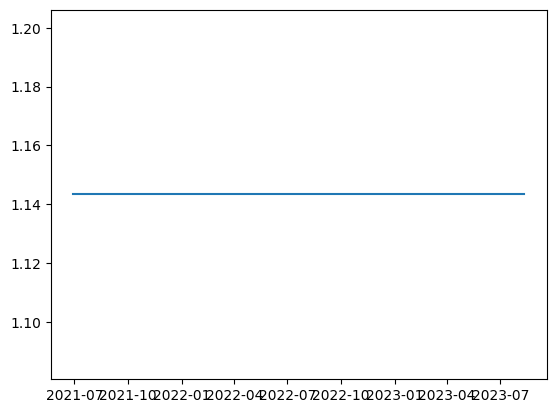

In [120]:
# y_test_predicted = predicted_test.reshape(-1)
# predicted_test = predicted_test.reshape(-1,1)
plot_test = np.zeros(len(data_date))
# predicted_test = predicted_test.reshape()

validate = df[train_set_size:]
validate['trained_test'] =  predicted_test[0]
# validate.head()
plt.plot(validate['trained_test'])
# plot_test.shape
# print(predicted_test.shape[0])
# plot_test[550:]=predicted_test
# plt.plot(plot_test)

In [116]:
# validate on test data
#1- without shuffling the data 
trian_dataloader = DataLoader(training_data,batch_size=1,shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=False)

# print(trian_dataloader)
#predict on the training data to see how the model is memorizing
model.eval()

# predict_train = np.empty((1,59,1),int)
predict_train = np.array([])

for i, (x,y) in enumerate(trian_dataloader):
    out = model(x)
    # out = out.detach().numpy()
    # print(out.shape)
    # predicted_train =np.append(predict_train, out,axis=0)
    # predicted_train = np.concatenate((predict_train,out))




np.shape(out)

torch.Size([1, 1])

In [103]:
#predict validation 
predict_val = np.empty((1,59,1),int)
# predict_val = np.array([])
for i, (x,y) in enumerate(test_dataloader):
    out = model(x)
    out = out.cpu().detach().numpy()
    # predicted_val = np.append(predict_val, out,axis=0)
print(np.shape(out))

(1, 59, 1)


In [94]:
test_set_size = int(np.round(0.2*df.shape[0]));
train_size = df.shape[0] - (test_set_size);
print(train_size )
data_train_pred_plot = np.zeros(len(df))
data_vald_pred_plot = np.zeros(len(df))
print(predicted_train.shape[0])
# data_vald_pred_plot[60:train_size + 60] = predicted_train
# df_train = np.array(df_train)
# df_train[test_set_size:]
# # fig,axis = plt.subplots(figsize=(8,8))
# # plt.plot(predict_train)
# predict_val

2133
2
